In [1]:
from sklearn.datasets import fetch_20newsgroups


In [5]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
print(f"Number of training documents: {len(newsgroups_train.data)}")

Number of training documents: 11314


In [6]:
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
print(f"Number of test documents: {len(newsgroups_test.data)}")

Number of test documents: 7532


In [7]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
len(newsgroups_train.target_names)

20

In [9]:
newsgroups_train.target

array([7, 4, 4, ..., 3, 1, 8], shape=(11314,))

In [10]:
newsgroups_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [11]:
print(len(newsgroups_train.data))
print(len(newsgroups_test.data))

11314
7532


In [14]:
# limpiar texto antes de vectorizar
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
from utils.paths import DATA_RAW_DIR

In [16]:
path = DATA_RAW_DIR / 'stopwords'
nltk.download('stopwords', download_dir=path)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasonssdev/Dev/Learning/UC/mcd-
[nltk_data]     nlp/data/raw/stopwords...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
nltk_dir = DATA_RAW_DIR / "nltk_data"
nltk.data.path.append(str(nltk_dir))

nltk.download("stopwords", download_dir=str(nltk_dir))
nltk.download("punkt_tab", download_dir=str(nltk_dir))
nltk.download("punkt", download_dir=str(nltk_dir))

nltk.download("wordnet", download_dir=str(nltk_dir))
nltk.download("omw-1.4", download_dir=str(nltk_dir))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasonssdev/Dev/Learning/UC/mcd-
[nltk_data]     nlp/data/raw/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jasonssdev/Dev/Learning/UC/mcd-
[nltk_data]     nlp/data/raw/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jasonssdev/Dev/Learning/UC/mcd-
[nltk_data]     nlp/data/raw/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jasonssdev/Dev/Learning/UC/mcd-
[nltk_data]     nlp/data/raw/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jasonssdev/Dev/Learning/UC/mcd-
[nltk_data]     nlp/data/raw/nltk_data...


True

In [17]:
# Load stop-words
stop_words = set(stopwords.words('english'))

In [19]:
tokenizer = RegexpTokenizer('[\'a-zA-Z]+')
lemmatizer = WordNetLemmatizer()

In [20]:
def tokenize(document):
    words = []

    for sentence in sent_tokenize(document):
        tokens = [lemmatizer.lemmatize(t.lower()) for t in tokenizer.tokenize(sentence) if t.lower() not in stop_words and len(t) > 2]
        words += tokens

    text = ' '.join(words)
    return text

In [21]:
train_docs = []
test_docs = []

In [24]:
# limpiar datos

for raw_text in newsgroups_train.data:
    text = tokenize(raw_text)
    train_docs.append(text)
    
for raw_text in newsgroups_test.data:
    text = tokenize(raw_text)
    test_docs.append(text)

In [25]:
# vectorizar usando TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train_docs)
vectors_test = vectorizer.transform(test_docs) # transform!!!
vectors.shape
vectors_test.shape

(7532, 67409)

In [29]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [31]:
clf.fit(vectors, newsgroups_train.target)
clf.score(vectors_test, newsgroups_test.target)

0.665693043016463

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
Y_predict = clf.predict(vectors_test)
print(classification_report(newsgroups_test.target, Y_predict))

              precision    recall  f1-score   support

           0       0.77      0.15      0.26       319
           1       0.70      0.68      0.69       389
           2       0.67      0.55      0.60       394
           3       0.56      0.72      0.63       392
           4       0.75      0.63      0.68       385
           5       0.78      0.78      0.78       395
           6       0.82      0.73      0.77       390
           7       0.84      0.72      0.78       396
           8       0.86      0.72      0.78       398
           9       0.92      0.79      0.85       397
          10       0.58      0.93      0.72       399
          11       0.55      0.81      0.65       396
          12       0.69      0.51      0.59       393
          13       0.85      0.77      0.81       396
          14       0.79      0.74      0.76       394
          15       0.35      0.92      0.51       398
          16       0.57      0.71      0.63       364
          17       0.83    

In [34]:
import itertools, matplotlib.pyplot as plt, numpy as np


In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


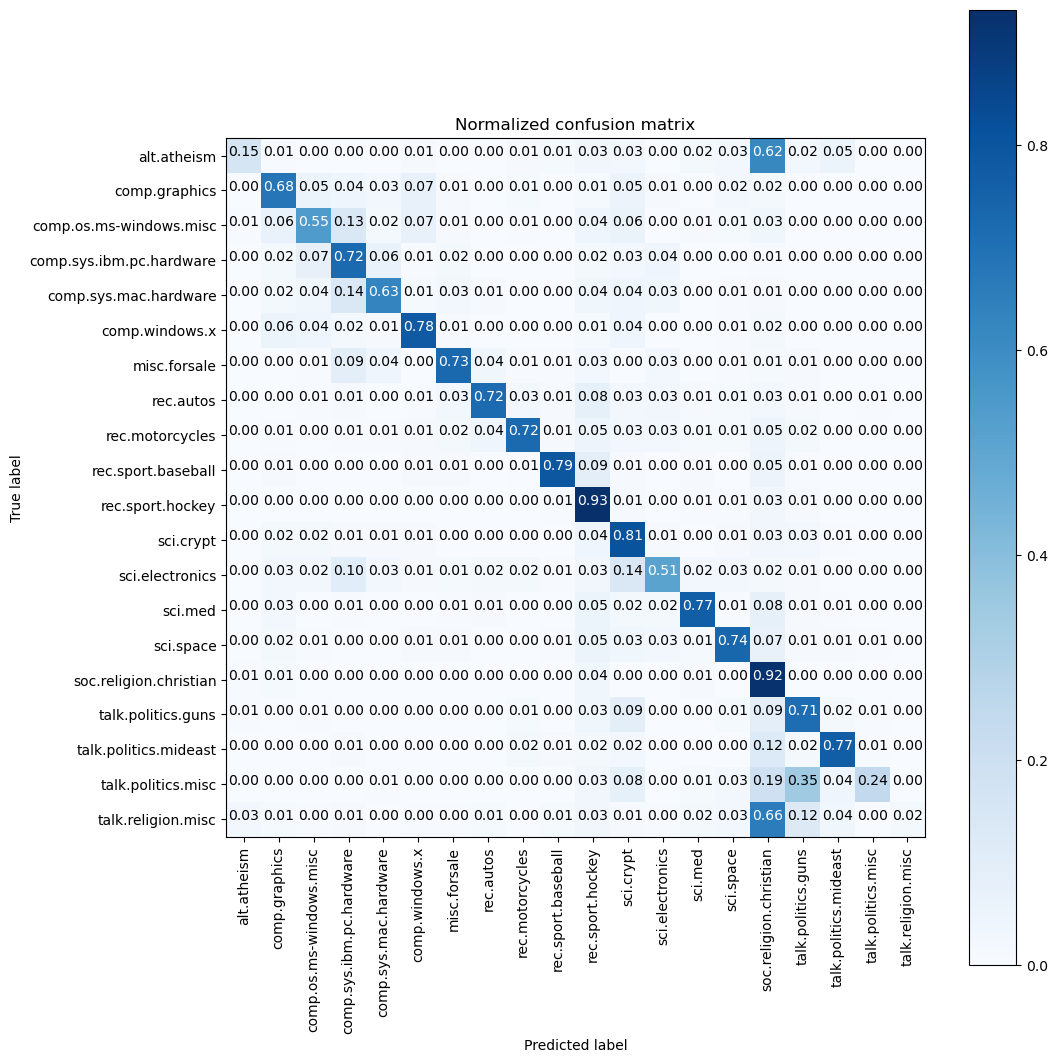

In [36]:
cnf_matrix = confusion_matrix(newsgroups_test.target, Y_predict)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(11, 11))
plot_confusion_matrix(cnf_matrix, classes=newsgroups_train.target_names, normalize=True, title='Normalized confusion matrix')

plt.show()

In [37]:
class_names = [x.split('.')[-1] if 'misc' not in x else '.'.join(x.split('.')[-2:]) for x in newsgroups_train.target_names]
class_names[3] = 'pc.hardware'
class_names[4] = 'mac.hardware'

In [38]:
from lime import lime_text
from sklearn.pipeline import make_pipeline

c = make_pipeline(vectorizer, clf)

In [39]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=class_names)

In [44]:
from IPython.display import display, HTML

display(HTML(exp.as_html(text=test_docs[idx])))

In [46]:
idx = 14

exp = explainer.explain_instance(test_docs[idx], c.predict_proba, num_features=5, top_labels=1)
display(HTML(exp.as_html(text=test_docs[idx])))